In [1]:
%reset
from numpy import *
from scipy import *

from scipy import stats 
from scipy import interpolate
# from scipy.interpolate import InterpolatedUnivariateSpline as IUS



import netCDF4 as nc
import numpy as np
from scipy.optimize import curve_fit
from numpy import exp, linspace, random
# import scipy as sp
import cmocean
import glob
import seawater
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import cmocean as cm

from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import warnings
warnings.filterwarnings('ignore')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
dpath = '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/DATASETS/'
MON_ljo=  (dpath+'co2dat/monthly/monthly_flask_co2_ljo.csv')
MON_ptb=  (dpath+'co2dat/monthly/monthly_flask_co2_ptb.csv')
MON_stp=  (dpath+'co2dat/monthly/monthly_flask_co2_stp.csv')

DAI_ljo=  (dpath+'co2dat/daily/daily_flask_co2_ljo.csv')
DAI_ptb=  (dpath+'co2dat/daily/daily_flask_co2_ptb.csv')
DAI_stp=  (dpath+'co2dat/daily/daily_flask_co2_stp.csv')



DMON_ljo = pd.read_csv(MON_ljo) 
DMON_ptb = pd.read_csv(MON_ptb) 
DMON_stp = pd.read_csv(MON_stp)

DDAI_ljo = pd.read_csv(DAI_ljo) 
DDAI_ptb = pd.read_csv(DAI_ptb) 
DDAI_stp = pd.read_csv(DAI_stp) 

In [4]:
ljo_val = DMON_ljo['Col5']
ptb_val = DMON_ptb['Col5']
stp_val = DMON_stp['Col5']

ljo_date = DMON_ljo['Decdate']
ptb_date = DMON_ptb['Decdate']
stp_date = DMON_stp['Decdate']

ljo_valD = DDAI_ljo['Val']
ptb_valD = DDAI_ptb['Val']
stp_valD = DDAI_stp['Val']

ljo_FlagD = DDAI_ljo['Flag']
ptb_FlagD = DDAI_ptb['Flag']
stp_FlagD = DDAI_stp['Flag']

ljo_dateD = DDAI_ljo['Decdate']
ptb_dateD = DDAI_ptb['Decdate']
stp_dateD = DDAI_stp['Decdate']

ljo_DD = ljo_dateD.values
ptb_DD = ptb_dateD.values
stp_DD = stp_dateD.values

ljo_VD = ljo_valD.values
ptb_VD = ptb_valD.values
stp_VD = stp_valD.values

ljo_VM = ljo_val.values
ptb_VM = ptb_val.values
stp_VM = stp_val.values

ljo_DM = ljo_date.values
ptb_DM = ptb_date.values
stp_DM = stp_date.values

ljo_VM[ljo_VM < -99] = nan
ptb_VM[ptb_VM < -99] = nan
stp_VM[stp_VM < -99] = nan

ptb_VD[ptb_VD > 1400] = nan

ljo_VD[ljo_FlagD != 0] = nan
ptb_VD[ptb_FlagD != 0] = nan
stp_VD[stp_FlagD != 0] = nan

In [5]:
# ptb_date = DMON_ptb['Decdate']
# stp_date = DMON_stp['Decdate']

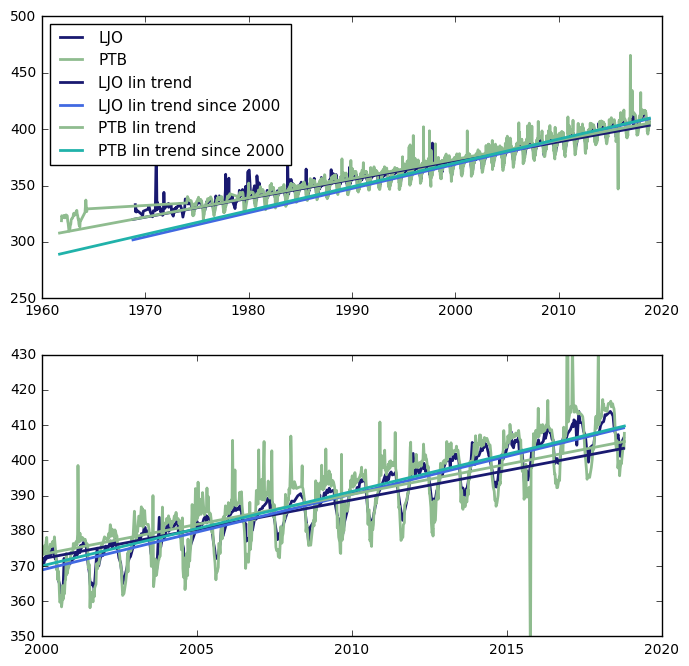

In [6]:
fig = plt.figure(figsize=(8,8))

for i in range(1,3):
    if i == 1:
        ax = fig.add_subplot(2,1,i)
        ax.plot(ljo_DD,ljo_VD,color = 'midnightblue',linewidth = 2,label = 'LJO')
        ax.plot(ptb_DD,ptb_VD,color = 'darkseagreen',linewidth = 2,label = 'PTB')
        
        #linear trend
        mask =   (~np.isnan(ljo_VD) & (ljo_VD <1000))
        mask2 =   (~np.isnan(ljo_VD) & (ljo_VD <1000) & (ljo_DD >= 2000))
        slope_ljo, intercept_ljo, r_value_ljo, p_value_ljo, std_err = stats.linregress(ljo_DD[mask],ljo_VD[mask])
        slope_ljo2, intercept_ljo2, r_value_ljo, p_value_ljo, std_err = stats.linregress(ljo_DD[mask2],ljo_VD[mask2])
        line_ljo = slope_ljo*ljo_DD+intercept_ljo
        line_ljo2 = slope_ljo2*ljo_DD+intercept_ljo2
        ax.plot(ljo_DD,line_ljo, color = 'midnightblue', linewidth = 2, label = 'LJO lin trend')
        ax.plot(ljo_DD,line_ljo2, color = 'royalblue', linewidth = 2, label = 'LJO lin trend since 2000')
        
        #linear trend
        mask =   (~np.isnan(ptb_VD) & (ptb_VD <1000))
        mask2 =   (~np.isnan(ptb_VD) & (ptb_VD <1000) & (ptb_DD >= 2000))
        slope_ptb, intercept_ptb, r_value_ptb, p_value_ptb, std_err = stats.linregress(ptb_DD[mask],ptb_VD[mask])
        slope_ptb2, intercept_ptb2, r_value_ptb, p_value_ptb, std_err = stats.linregress(ptb_DD[mask2],ptb_VD[mask2])
        line_ptb = slope_ptb*ptb_DD+intercept_ptb
        line_ptb2 = slope_ptb2*ptb_DD+intercept_ptb2
        ax.plot(ptb_DD,line_ptb, color = 'darkseagreen', linewidth = 2, label = 'PTB lin trend')
        ax.plot(ptb_DD,line_ptb2, color = 'lightseagreen', linewidth = 2, label = 'PTB lin trend since 2000')

        ax.legend(loc='best',fontsize = 11)

    if i == 2:
        ax = fig.add_subplot(2,1,i)
        ax = fig.add_subplot(2,1,i)
        ax.plot(ljo_DD,ljo_VD,color = 'midnightblue',linewidth = 2,label = 'LJO')
        ax.plot(ptb_DD,ptb_VD,color = 'darkseagreen',linewidth = 2,label = 'PTB')
        
        #linear trend
        mask =   (~np.isnan(ljo_VD) & (ljo_VD <1000))
        mask2 =   (~np.isnan(ljo_VD) & (ljo_VD <1000) & (ljo_DD >= 2000))
        slope_ljo, intercept_ljo, r_value_ljo, p_value_ljo, std_err = stats.linregress(ljo_DD[mask],ljo_VD[mask])
        slope_ljo2, intercept_ljo2, r_value_ljo, p_value_ljo, std_err = stats.linregress(ljo_DD[mask2],ljo_VD[mask2])
        line_ljo = slope_ljo*ljo_DD+intercept_ljo
        line_ljo2 = slope_ljo2*ljo_DD+intercept_ljo2
        ax.plot(ljo_DD,line_ljo, color = 'midnightblue', linewidth = 2, label = 'LJO lin trend')
        ax.plot(ljo_DD,line_ljo2, color = 'royalblue', linewidth = 2, label = 'LJO lin trend since 2000')
        
        #linear trend
        mask =   (~np.isnan(ptb_VD) & (ptb_VD <1000))
        mask2 =   (~np.isnan(ptb_VD) & (ptb_VD <1000) & (ptb_DD >= 2000))
        slope_ptb, intercept_ptb, r_value_ptb, p_value_ptb, std_err = stats.linregress(ptb_DD[mask],ptb_VD[mask])
        slope_ptb2, intercept_ptb2, r_value_ptb, p_value_ptb, std_err = stats.linregress(ptb_DD[mask2],ptb_VD[mask2])
        line_ptb = slope_ptb*ptb_DD+intercept_ptb
        line_ptb2 = slope_ptb2*ptb_DD+intercept_ptb2
        ax.plot(ptb_DD,line_ptb, color = 'darkseagreen', linewidth = 2, label = 'PTB lin trend')
        ax.plot(ptb_DD,line_ptb2, color = 'lightseagreen', linewidth = 2, label = 'PTB lin trend since 2000')

        #ax.legend(loc='best',fontsize = 11)
        ax.set_xlim([2000,2020])
        ax.set_ylim([350,430])

In [7]:
cmap = cm.cm.thermal  # define the colormap
# extract all colors from the .jet map

cmaplist = [cmap(i) for i in range(cmap.N)]


In [8]:
mask =   (~np.isnan(ljo_VD) & (ljo_VD <1000))
mask2 =   (~np.isnan(ljo_VD) & (ljo_VD <1000) & (ljo_DD >= 2000))
slope_ljo, intercept_ljo, r_value_ljo, p_value_ljo, std_err = stats.linregress(ljo_DD[mask],ljo_VD[mask])
slope_ljo2, intercept_ljo2, r_value_ljo, p_value_ljo, std_err = stats.linregress(ljo_DD[mask2],ljo_VD[mask2])
line_ljo = slope_ljo*ljo_DD+intercept_ljo
line_ljo2 = slope_ljo2*ljo_DD+intercept_ljo2

mask_ptb =   (~np.isnan(ptb_VD) & (ptb_VD <1000))
mask2_ptb =   (~np.isnan(ptb_VD) & (ptb_VD <1000) & (ptb_DD >= 2000))
slope_ptb, intercept_ptb, r_value_ptb, p_value_ptb, std_err = stats.linregress(ptb_DD[mask_ptb],ptb_VD[mask_ptb])
slope_ptb2, intercept_ptb2, r_value_ptb, p_value_ptb, std_err = stats.linregress(ptb_DD[mask2_ptb],ptb_VD[mask2_ptb])
line_ptb = slope_ptb*ptb_DD+intercept_ptb
line_ptb2 = slope_ptb2*ptb_DD+intercept_ptb2
ptb_detrend = ptb_VD - line_ptb
ptb_detrend2000 = ptb_VD - line_ptb2
ljo_detrend = ljo_VD - line_ljo
ljo_detrend2000 = ljo_VD - line_ljo2

In [9]:
from scipy.interpolate import interp1d


w_ptb = np.zeros([10000,18]) 
w_ljo = np.zeros([10000,18]) 

for y in range(2000,2018):
    ind = 2000-y
    cind = int(((y-2000)/20) *256)
    mask =   ((ljo_DD>=y) & (ljo_DD <y+1)) 
    tx = ljo_DD[mask]-y
    ty = ljo_detrend2000[mask]
    tmin = min(tx)
    tmax = max(tx)
    xnew = np.arange(tmin, tmax, 0.0001)
    f = interp1d(tx,ty)
    f = interpolate.interp1d(tx, ty)
#     f = sp.interpolate.interp1d(tx,ty)
#     #f = interpolate.interp1d(tx, ty)
#     ynew = f(xnew)
#     firstx = int(min(xnew)*10000)
#     w_ljo[firstx:firstx+len(xnew),ind] = ynew
#     t_xs = np.arange(0,1,0.0001)
#     w_ljo[w_ljo==0] = nan
    
# for y in range(2000,2018):
#     ind = 2000-y
#     cind = int(((y-2000)/20) *256)
#     mask =   ((ptb_DD>=y) & (ptb_DD <y+1)) 
#     tx = ptb_DD[mask]-y
#     ty = ptb_detrend2000[mask]
#     tmin = min(tx)
#     tmax = max(tx)
#     #             minlist.append(tmin)
#     #             maxlist.append(tmax)
#     #             span = tmax-tmin
#     #             days_span = span * 365
#     xnew = np.arange(tmin, tmax, 0.0001)
#     f = interpolate.interp1d(tx, ty)
#     ynew = f(xnew)
#     firstx = int(min(xnew)*10000)
#     w_ptb[firstx:firstx+len(xnew),ind] = ynew
#     t_xs = np.arange(0,1,0.0001)
#     w_ptb[w_ptb==0] = nan
    
# w_ljo_smoothed = np.zeros([10000,1])
# w_ptb_smoothed = np.zeros([10000,1])

# w_ljo_COPY = np.copy(w_ljo)
# w_ptb_COPY = np.copy(w_ptb)
# for i in range(0,len(w_ljo[:,0])):
#     t_val = w_ljo_COPY[i,:]
#     cutoff_up = np.nanmean(t_val) + 1* np.nanstd(t_val)
#     cutoff_down = np.nanmean(t_val) - 1* np.nanstd(t_val)
#     t_val[t_val>cutoff_up] = np.nan
#     t_val[t_val<cutoff_down] = np.nan
#     w_ljo_smoothed[i] = np.nanmean(t_val)
    
#     t_val2 = w_ptb_COPY[i,:]
#     cutoff_up2 = np.nanmean(t_val2) + 1* np.nanstd(t_val2)
#     cutoff_down2 = np.nanmean(t_val2) - 1* np.nanstd(t_val2)
#     t_val2[t_val2>cutoff_up2] = np.nan
#     t_val2[t_val2<cutoff_down2] = np.nan
#     w_ptb_smoothed[i] = np.nanmean(t_val2)

ImportError: cannot import name 'interp1d'

In [ ]:
w_ljo_COPY2 = np.copy(w_ljo)


In [ ]:

nop = 8
fig = plt.figure(figsize=(12,8))
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(nop/2,2,i)
        ax.plot(ljo_DD,ljo_VD-line_ljo, color = 'midnightblue', linewidth = 2)
        ax.plot(ljo_DD,ljo_VD-line_ljo2, color = 'royalblue', linewidth = 2)
        ax.set_xlim([2000,2020])
        ax.set_ylim([-20,20])
        
    if i == 2:
        ax = fig.add_subplot(nop/2,2,i)
        ax.plot(ptb_DD,ptb_VD-line_ptb, color = 'darkseagreen', linewidth = 2)
        ax.plot(ptb_DD,ptb_VD-line_ptb2, color = 'lightseagreen', linewidth = 2)
        ax.set_xlim([2000,2020])
        ax.set_ylim([-20,20])

        #la jolla yearly cycle
    if i == 3:
        ax = fig.add_subplot(nop/2,2,i)
        #lajolla
        ljo_detrend = ljo_VD-line_ljo
        ljo_detrend2000 = ljo_VD-line_ljo2
        for y in range(2000,2020):
            cind = int(((y-2000)/20) *256)
            mask =   ((ljo_DD>=y) & (ljo_DD <y+1)) 
            ax.plot(ljo_DD[mask]-y,ljo_detrend[mask], color = cmaplist[cind], linewidth = 1)
        

    if i == 5:
        ax = fig.add_subplot(nop/2,2,i)
        #lajolla
        ljo_detrend = ljo_VD-line_ljo
        ljo_detrend2000 = ljo_VD-line_ljo2
        for y in range(2000,2020):
            cind = int(((y-2000)/20) *256)
            mask =   ((ljo_DD>=y) & (ljo_DD <y+1)) 
            ax.plot(ljo_DD[mask]-y,ljo_detrend2000[mask], color = cmaplist[cind], linewidth = 1)

    if i == 4:
        ax = fig.add_subplot(nop/2,2,i)
        #lajolla
        ptb_detrend = ptb_VD-line_ptb
        ptb_detrend2000 = ptb_VD-line_ptb2
        for y in range(2000,2020):
            cind = int(((y-2000)/20) *256)
            mask =   ((ptb_DD>=y) & (ptb_DD <y+1)) 
            ax.plot(ptb_DD[mask]-y,ptb_detrend[mask], color = cmaplist[cind], linewidth = 1)
        ax.title

    if i == 6:
        ax = fig.add_subplot(nop/2,2,i)
        #lajolla
        ptb_detrend = ptb_VD-line_ptb
        ptb_detrend2000 = ptb_VD-line_ptb2
        for y in range(2000,2020):
            cind = int(((y-2000)/20) *256)
            mask =   ((ptb_DD>=y) & (ptb_DD <y+1)) 
            ax.plot(ptb_DD[mask]-y,ptb_detrend2000[mask], color = cmaplist[cind], linewidth = 1)

    if i == 7:
        ax = fig.add_subplot(nop/2,2,i)
        ax.plot(t_xs, np.nanmean(w_ljo,axis=1), '-',color ='royalblue', linewidth = 2)
        ax.set_ylim([-15,10])
        w_ljoDONE = w_ljo
        
   
    if i == 8:
        ax = fig.add_subplot(nop/2,2,i)
        ax.plot(t_xs, np.nanmean(w_ptb,axis=1), '-',color ='lightseagreen', linewidth = 2)
        ax.set_ylim([-15,10])
        w_ptbDONE = w_ptb
        

In [ ]:

nop = 8
fig = plt.figure(figsize=(12,8))
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(nop/2,2,i)
        ax.plot(ljo_DD,ljo_VD-line_ljo, color = 'midnightblue', linewidth = 2)
        ax.plot(ljo_DD,ljo_VD-line_ljo2, color = 'royalblue', linewidth = 2)
        ax.set_xlim([2000,2020])
        ax.set_ylim([-20,20])
        
    if i == 2:
        ax = fig.add_subplot(nop/2,2,i)
        ax.plot(ptb_DD,ptb_VD-line_ptb, color = 'darkseagreen', linewidth = 2)
        ax.plot(ptb_DD,ptb_VD-line_ptb2, color = 'lightseagreen', linewidth = 2)
        ax.set_xlim([2000,2020])
        ax.set_ylim([-20,20])

        #la jolla yearly cycle
    if i == 3:
        ax = fig.add_subplot(nop/2,2,i)
        #lajolla
        ljo_detrend = ljo_VD-line_ljo
        ljo_detrend2000 = ljo_VD-line_ljo2
        for y in range(2000,2020):
            cind = int(((y-2000)/20) *256)
            mask =   ((ljo_DD>=y) & (ljo_DD <y+1)) 
            ax.plot(ljo_DD[mask]-y,ljo_detrend[mask], color = cmaplist[cind], linewidth = 1)
        

    if i == 5:
        ax = fig.add_subplot(nop/2,2,i)
        #lajolla
        ljo_detrend = ljo_VD-line_ljo
        ljo_detrend2000 = ljo_VD-line_ljo2
        for y in range(2000,2020):
            cind = int(((y-2000)/20) *256)
            mask =   ((ljo_DD>=y) & (ljo_DD <y+1)) 
            ax.plot(ljo_DD[mask]-y,ljo_detrend2000[mask], color = cmaplist[cind], linewidth = 1)

    if i == 4:
        ax = fig.add_subplot(nop/2,2,i)
        #lajolla
        ptb_detrend = ptb_VD-line_ptb
        ptb_detrend2000 = ptb_VD-line_ptb2
        for y in range(2000,2020):
            cind = int(((y-2000)/20) *256)
            mask =   ((ptb_DD>=y) & (ptb_DD <y+1)) 
            ax.plot(ptb_DD[mask]-y,ptb_detrend[mask], color = cmaplist[cind], linewidth = 1)
        ax.title

    if i == 6:
        ax = fig.add_subplot(nop/2,2,i)
        #lajolla
        ptb_detrend = ptb_VD-line_ptb
        ptb_detrend2000 = ptb_VD-line_ptb2
        for y in range(2000,2020):
            cind = int(((y-2000)/20) *256)
            mask =   ((ptb_DD>=y) & (ptb_DD <y+1)) 
            ax.plot(ptb_DD[mask]-y,ptb_detrend2000[mask], color = cmaplist[cind], linewidth = 1)

    if i == 7:
        ax = fig.add_subplot(nop/2,2,i)
        ax.plot(t_xs, np.nanmean(w_ljo,axis=1), '-',color ='royalblue', linewidth = 2)
        ax.plot(t_xs, w_ljo_smoothed, '-',color ='red', linewidth = 2)
        ax.set_ylim([-15,10])

   
    if i == 8:
        ax = fig.add_subplot(nop/2,2,i)
        ax.plot(t_xs, np.nanmean(w_ptb,axis=1), '-',color ='lightseagreen', linewidth = 2)
        ax.plot(t_xs, w_ptb_smoothed, '-',color ='red', linewidth = 2)
        
        ax.set_ylim([-15,10])

        

In [ ]:
w_salishsea_smoothed = (w_ljo_smoothed + w_ptb_smoothed)/2

In [ ]:

nop = 1
fig = plt.figure(figsize=(12,8))
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(1,1,i)
        #ax.plot(t_xs, np.nanmean(w_ljoDONE,axis=1), '-',color ='', linewidth = 2)
        ax.plot(t_xs, w_ljo_smoothed, linestyle = '-',color ='royalblue', linewidth = 3, label = 'LJO smoothed')
        ax.plot(t_xs, w_ptb_smoothed, linestyle = '-',color ='lightseagreen', linewidth = 3, label = 'PTB smoothed')
        ax.plot(t_xs,w_salishsea_smoothed,linestyle = '-',color ='red', linewidth = 3, label = 'avg LJO-PTB (smoothed)')
        ax.plot(t_xs, np.nanmean(w_ptb,axis=1), '-',color ='lightseagreen', linewidth = 1, label = 'PTB raw')
        ax.plot(t_xs, np.nanmean(w_ljo,axis=1), '-',color ='royalblue', linewidth = 1, label = 'LJO raw')
        ax.legend(loc = 'best')
        ax.set_ylim([-15,10])
        
        ax.set_title('Raw and smoothed LJO and PTB seasonal cycles of co2, with red average')
        

    

In [ ]:
xs_nonans = []
ys_nonans = []
for i in range(0,len(t_xs)):
    if ~np.isnan(t_xs[i]) & ~np.isnan(w_salishsea_smoothed[i]):
        xs_nonans.append(t_xs[i])
        ys_nonans.append(w_salishsea_smoothed[i])
        
print(len(xs_nonans))
        
print(np.shape(xs_nonans))
xs_comp = np.squeeze(xs_nonans)
ys_comp = np.squeeze(ys_nonans)
print(np.shape(xs_comp))
print(type(xs_comp))

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

x = xs_comp * 365
y = ys_comp


def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

guess2 = [0.3*365, 6, 0.5*365,0.88*365, 12, 0.5*365]

popt2_fin, pcov2 = curve_fit(func, x, y, p0=guess2)
fit2 = func(x, *popt2_fin)

y2 = np.zeros_like(x)
ctr =167.98738197   
amp = 5.48937161  
wid = 186.32369138  
ctr2 = 232.85253244  
amp2 = -15.36389755
wid2 = -61.42562232
y2 = y2 + amp * np.exp( -((x - ctr)/wid)**2) + amp2 * np.exp( -((x - ctr2)/wid2)**2)


print('*')
# print(*popt2)
# print(popt2)
plt.plot(x, y)

plt.plot(x, fit2 , 'k-')
plt.plot(x, y2, 'r:',linewidth = 2)
plt.title('2 gaussian fit to raw data')
plt.show()

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

x = xs_comp * 365
y = ys_comp


def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

guess2 = [0.3*365, 6, 0.5*365,0.88*365, 12, 0.5*365, 350,3.5,0.3*365]
guess2 = [0.3*365, 6, 0.5*365,0.88*365, 12, 0.5*365, 352,3.4,0.3*365]

popt2_fin, pcov2 = curve_fit(func, x, y, p0=guess2)
print(popt2_fin)
fit2 = func(x, *popt2_fin)
print()
#[ 161.89823312    7.08257648   44.70337477  
# 218.83206615  -19.00385308  87.88258456  
#199.4298405     8.02562064 -185.92035586]
y2 = np.zeros_like(x)
ctr =161.89823312   
amp = 7.08257648  
wid = 44.70337477  

ctr2 = 218.83206615  
amp2 = -19.00385308
wid2 = 87.88258456

ctr3 = 199.4298405
amp3 = 8.02562064
wid3 = -185.92035586

y2 = y2 + amp * np.exp( -((x - ctr)/wid)**2)\
+ amp2 * np.exp( -((x - ctr2)/wid2)**2)\
+ amp3 * np.exp( -((x - ctr3)/wid3)**2)
#     print(y2)

# finval = (year+yearday/365)*LR_slope+LR_intercept + y2 #+ 14.6023001473/2

print('*')
# print(*popt2)
# print(popt2)
plt.plot(x, y)
plt.plot(x, y2)
# print(fit2[364])
# print(fit2[0])
# print(y[364])

plt.plot(x, fit2 , 'k-')
plt.title('3-gaussian fit to averaged co2 seasonal cycle (between barrow and la jolla)')
#plt.plot(x, y2, 'r:',linewidth = 2)
# amplit = max(fit2) - min(fit2)
# print(amplit)

In [ ]:
def atm_co2_gauss(year, yearday, LR_slope, LR_intercept):
    
    y2 = 0
    x = yearday
#     [ 161.89823312    7.08257648   44.70337477  218.83206615  -19.00385308
#    87.88258456  199.4298405     8.02562064 -185.92035586]
    ctr =161.89823312   
    amp = 7.08257648  
    wid = 44.70337477  

    ctr2 = 218.83206615  
    amp2 = -19.00385308
    wid2 = 87.88258456

    ctr3 = 199.4298405
    amp3 = 8.02562064
    wid3 = -185.92035586

    y2 = y2 + amp * np.exp( -((x - ctr)/wid)**2)\
    + amp2 * np.exp( -((x - ctr2)/wid2)**2)\
    + amp3 * np.exp( -((x - ctr3)/wid3)**2)
    
    finval = (year+yearday/365)*LR_slope+LR_intercept + y2 
#     print(finval)
    return finval



    

In [ ]:
test_years = np.arange(2000,2020,.01)
test_data_ljo = np.zeros_like(test_years)
test_data_ptb = np.zeros_like(test_years)
test_data_notrend = np.zeros_like(test_years)

In [ ]:
LR_slope_ljo = slope_ljo2
LR_intercept_ljo = intercept_ljo2

LR_slope_ptb = slope_ptb2
LR_intercept_ptb = intercept_ptb2

LR_slope_notrend = 0
LR_intercept_notrend = 0

for i in range(0,len(test_years)):
    t_year = int(test_years[i])
    t_yearday = (test_years[i]-int(test_years[i]))*365
    fin_val_ljo = atm_co2_gauss(t_year, t_yearday, LR_slope_ljo, LR_intercept_ljo)
    fin_val_ptb = atm_co2_gauss(t_year, t_yearday, LR_slope_ptb, LR_intercept_ptb)
    fin_val_notrend = atm_co2_gauss(t_year, t_yearday, 0, 0)
    test_data_ljo[i] = fin_val_ljo
    test_data_ptb[i] = fin_val_ptb
    test_data_notrend[i] = fin_val_notrend

In [ ]:
plt.plot(test_years,test_data_ljo, color = 'royalblue',linewidth = 2, label = 'gauss - LJO lin.reg')
plt.plot(test_years,test_data_ptb, color = 'lightseagreen', label = 'gauss - PTB lin.reg')
plt.plot(ljo_DD,ljo_VD,color = 'midnightblue',linewidth = 2,label = 'LJO RAW')
plt.plot(ptb_DD,ptb_VD,color = 'darkseagreen',linewidth = 2,label = 'PTB RAW')
plt.xlim([2015,2016])
plt.ylim([380,420])
plt.title('year 2015, gaussian fit and raw data')
plt.legend(loc ='best')


In [ ]:
plt.plot(test_years,test_data_ljo, color = 'royalblue',linewidth = 2, label = 'gauss - LJO lin.reg')
plt.plot(test_years,test_data_ptb, color = 'lightseagreen', label = 'gauss - PTB lin.reg')
plt.plot(ljo_DD,ljo_VD,color = 'midnightblue',linewidth = 2,label = 'LJO RAW')
plt.plot(ptb_DD,ptb_VD,color = 'darkseagreen',linewidth = 2,label = 'PTB RAW')
plt.xlim([2010,2020])
plt.ylim([380,420])
plt.legend(loc ='best')
plt.title('year 2010-2020, gaussian fit and raw data')

In [ ]:
print('DONE')